In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [2]:
df = pd.read_csv('df_clean_class.csv', index_col='Name_Short')
df

,Emax_amylase_2.75mcgml,Emax_glucosidase_0.67mcgml,IC50_amylase,IC50_glucosidase,Bioactivity_class_amylase,Bioactivity_class_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones,Bioactivity_class
Name_Short,,,,,,,,,,,,,,,
G_cowa,99.6,51.1,0.13,0.63,active,active,0,0,0,0,0,2,2,2,active_both
P_debilis,99.5,50.0,0.14,0.72,active,active,3,0,0,5,3,0,0,0,active_both
P_evecta_leaf,93.9,52.0,0.14,0.57,active,active,0,0,0,3,0,3,2,0,active_both
P_evecta_Rhizome,35.8,50.6,NaN,0.63,inactive,active,3,0,0,5,3,0,0,5,active_glucosidase
E_cuneatum,86.5,39.6,0.17,NaN,active,inactive,3,0,0,2,0,3,3,0,active_amylase
P_anamense,35.1,54.5,NaN,0.52,inactive,active,3,0,0,3,3,3,2,0,active_glucosidase
A_marginata,16.0,37.6,NaN,NaN,inactive,inactive,0,0,0,2,0,3,3,0,inactive
E_cherrevensis,77.8,39.8,0.18,NaN,active,inactive,5,0,1,2,0,3,0,0,active_amylase
F_indica,84.4,39.1,0.16,NaN,active,inactive,3,1,0,3,3,2,2,0,active_amylase


# อาจลอง cluster แบบรวมก่อน แล้วค่อย แยก ออกมาเป็น เรื่องแยก 

In [3]:
plant_df = df.copy()
fingerprint_to_model = plant_df[['Alkaloids', 'Antaquinones', 'Carotenoids', 'flavonoids', 'Reducing_sugars', 'Saponins', 'Tannins', 'Xanthones']]
label_to_model = plant_df.Bioactivity_class.tolist()

In [4]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

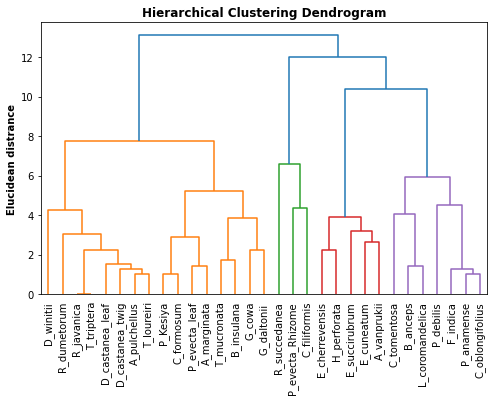

In [5]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(fingerprint_to_model)


plt.figure(figsize=(8,5))

plt.style.use('fast')
plt.title('Hierarchical Clustering Dendrogram', fontweight='bold')
# plot the top three levels of the dendrogram
plot_dendrogram(model, leaf_rotation=90, leaf_font_size=10, labels=df.index)
plt.ylabel("Elucidean distrance", fontweight='bold')
plt.savefig('HCA.pdf', dpi=300)
plt.show()

In [7]:
# Create a color palette with 3 colors for the 3 cyl possibilities
my_palette = plt.cm.get_cmap("Accent", 4)

In [8]:
# transforme the 'cyl' column in a categorical variable. It will allow to put one color on each level.
df['Bioactivity_class']=pd.Categorical(df['Bioactivity_class'])
my_color=df['Bioactivity_class'].cat.codes

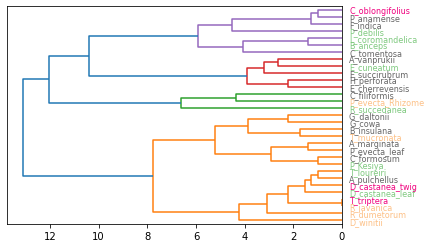

In [13]:
Z = linkage(fingerprint_to_model, 'ward')
 
# Make the dendrogram
dendrogram(Z, labels=df.index, leaf_rotation=0, orientation="left")
# Create a color palette with 3 colors for the 3 cyl possibilities
my_palette = plt.cm.get_cmap("Accent", 4)

# transforme the 'cyl' column in a categorical variable. It will allow to put one color on each level.
df['Bioactivity_class']=pd.Categorical(df['Bioactivity_class'])
my_color=df['Bioactivity_class'].cat.codes

ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
num=-1
for lbl in xlbls:
    num+=1
    val=my_color[num]
    lbl.set_color(my_palette(val))

# Show the graph
plt.show()